In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [33]:
well = pd.read_excel("well a.xlsx")
well1 = well.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
well1.columns = headers
well1.head()

,position,pressure,length,distance
1,NaN,753.25,NaN,NaN
2,0.00,813.09,4919.92,2074.33
3,661.39,821.57,5313.79,2735.72
4,1346.68,815.66,5943.17,3421.01
5,2106.99,812.15,7032.59,4181.32


In [34]:
well1['distance'].replace(np.nan, 0, inplace=True)
well1['length'].replace(np.nan, 0, inplace=True)

C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [134]:

X = well1.iloc[1:,:1].values
y = well1.iloc[1:,1:2].values


<Figure size 432x288 with 0 Axes>

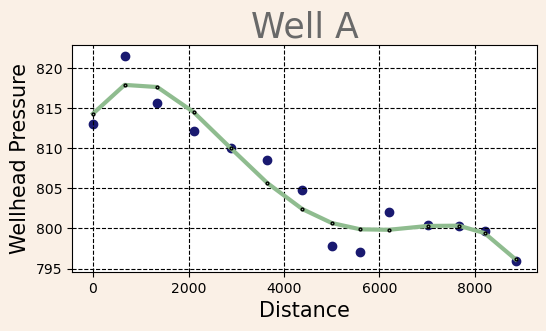

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4)
# Transform our x input to 1, x and x^2
X_poly = poly.fit_transform(X)
# Show the transformation on the notebook
pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(X, y, c = "midnightblue")
plt.title('Well A',{'fontsize':25,'color':'dimgray'})
plt.xlabel("Distance",fontdict={'fontsize':15})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':15})
plt.grid(b=True,which='both',linestyle='--',color='black',animated=True)
plt.magma()
plt.plot(X, y_pred,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')

plt.savefig('wella.png',dpi=300,orientation='landscape')
plt.show()

In [137]:
#to find the distance from the node the connected with well a and the trunk line we can use this function
def minimum(model,pol,pressure):    
    c = 0
    smallest= None
    for i in range(0,9000,100):
        hu = model.predict(pol.fit_transform([[i]]))
        error =(hu-pressure)/pressure     #the percent of change in pressure in each well
        dictionary = {i:error}

        for itervar in error:
            if smallest is None or itervar < smallest:
                smallest = itervar
                c= 0 + i

    print('Smallest:', smallest)
    print('the distance to the smallest change:',c)


In [138]:
a = minimum(pr_model,poly,753.25)

Smallest: [0.05648312]
the distance to the smallest change: 8900


   position  pressure(wellhead) psia   length  distance
0       NaN                      NaN      NaN       NaN
1       NaN                   951.22      NaN       NaN
2      0.00                  1034.68  4831.51   1985.92
3    661.39                  1041.75  5225.38   2647.31
4   1346.68                  1037.36  5854.76   3332.60


C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

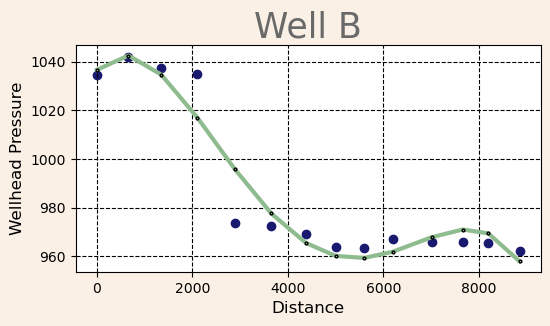

In [86]:
wellb = pd.read_excel("well b.xlsx")
print(wellb.head())
wellb1 = wellb.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
wellb1.columns = headers

wellb1['distance'].replace(np.nan, 0, inplace=True)
wellb1['length'].replace(np.nan, 0, inplace=True)
Xb = wellb1.iloc[1:,:1].values
yb = wellb1.iloc[1:,1:2].values

polyb = PolynomialFeatures(degree=4)
# Transform our x input to 1, x and x^2
X_polyb = poly.fit_transform(X)
pr_modelb = LinearRegression()
pr_modelb.fit(X_polyb, yb)
y_predb = pr_modelb.predict(X_polyb)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(Xb, yb, c = "midnightblue")
plt.title('Well B',{'fontsize':25,'color':'dimgray'})
plt.xlabel("Distance",fontdict={'fontsize':12})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':12})
plt.grid(b=True,which='both',linestyle='--',color='black',animated=True)
plt.magma()
plt.plot(Xb, y_predb,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')


plt.show()



In [139]:
b = minimum(pr_modelb,polyb,951.22)

Smallest: [0.00558174]
the distance to the smallest change: 8900


# well c

In [80]:
wellc = pd.read_excel("well c.xlsx")
print(wellc.head())
wellc1 = wellc.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
wellc1.columns = headers

wellc1['distance'].replace(np.nan, 0, inplace=True)
wellc1['length'].replace(np.nan, 0, inplace=True)
Xc = wellc1.iloc[1:,:1].values
yc = wellc1.iloc[1:,1:2].values

   position  pressure    length  distance
0       NaN       NaN       NaN       NaN
1       NaN    814.39       NaN       NaN
2      0.00    847.72  15252.16  12406.57
3    661.39    851.45  14323.25  11745.18
4   1346.68    849.46  13582.05  11059.89


C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

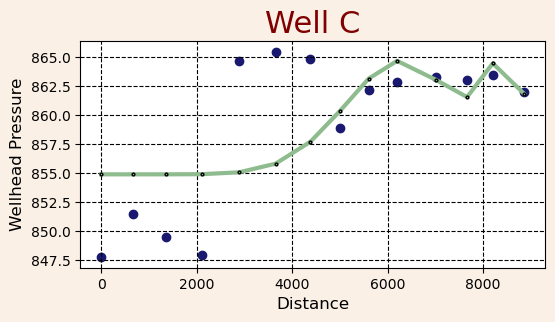

In [142]:
polyc = PolynomialFeatures(degree=12)
# Transform our x input to 1, x and x^2
X_polyc = polyc.fit_transform(Xc)
pr_modelc = LinearRegression()
pr_modelc.fit(X_polyc, yc)
y_predc = pr_modelc.predict(X_polyc)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(Xc, yc, c = "midnightblue")
plt.title('Well C',{'fontsize':22,'color':'maroon'})
plt.xlabel("Distance",fontdict={'fontsize':12})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':12})
plt.grid(b=True,which='both',linestyle='--',color='black')
plt.magma()
plt.plot(Xc, y_predc,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')


plt.show()

In [130]:
c = 0
smallest= None
for i in range(0,9000,500):
    hu = pr_modelc.predict(polyc.fit_transform([[i]]))
    error =(hu-814)/814
    dictionary = {i:error}
    
    for itervar in error:
        if smallest is None or itervar < smallest:
            smallest = itervar
            c= 0 + i
        
print('Smallest:', smallest)
print(c)


Smallest: [0.0502364]
0


In [140]:
c = minimum(pr_modelc,polyc,814.39)

Smallest: [0.04973346]
the distance to the smallest change: 0


# well E

In [141]:
welle = pd.read_excel("well e.xlsx")
print(welle.head())
welle1 = welle.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
welle1.columns = headers

welle1['distance'].replace(np.nan, 0, inplace=True)
welle1['length'].replace(np.nan, 0, inplace=True)
Xe = welle1.iloc[1:,:1].values
ye = welle1.iloc[1:,1:2].values

   position  pressure    length  distance 
0       NaN       NaN       NaN        NaN
1       NaN    782.13       NaN        NaN
2      0.00    827.43  14764.08   11918.49
3    661.39    830.44  13835.17   11257.10
4   1346.68    827.58  13093.97   10571.81


C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

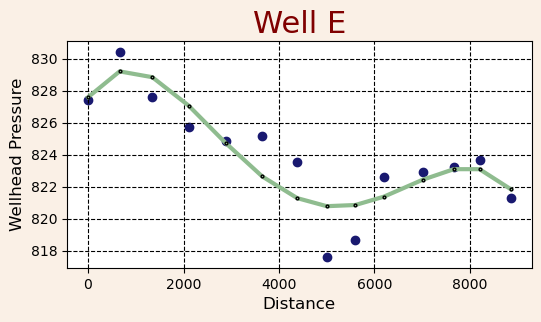

In [143]:
polye = PolynomialFeatures(degree=4)
# Transform our x input to 1, x and x^2
X_polye = polye.fit_transform(Xe)
pr_modele = LinearRegression()
pr_modele.fit(X_polye, ye)
y_prede = pr_modele.predict(X_polye)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(Xe, ye, c = "midnightblue")
plt.title('Well E',{'fontsize':22,'color':'maroon'})
plt.xlabel("Distance",fontdict={'fontsize':12})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':12})
plt.grid(b=True,which='both',linestyle='--',color='black')
plt.magma()
plt.plot(Xe, y_prede,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')


plt.show()

In [144]:
e = minimum(pr_modele,polye,782.13)

Smallest: [0.04938295]
the distance to the smallest change: 5200


# well F

In [145]:
wellf = pd.read_excel("well f.xlsx")
print(wellf.head())
wellf1 = wellf.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
wellf1.columns = headers

wellf1['distance'].replace(np.nan, 0, inplace=True)
wellf1['length'].replace(np.nan, 0, inplace=True)
Xf = wellf1.iloc[1:,:1].values
yf = wellf1.iloc[1:,1:2].values

   position  pressure    length  distance
0       NaN       NaN       NaN       NaN
1       NaN    744.53       NaN       NaN
2      0.00    789.86  13977.91  11132.32
3    661.39    794.86  13049.00  10470.93
4   1346.68    791.88  12307.80   9785.64


C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

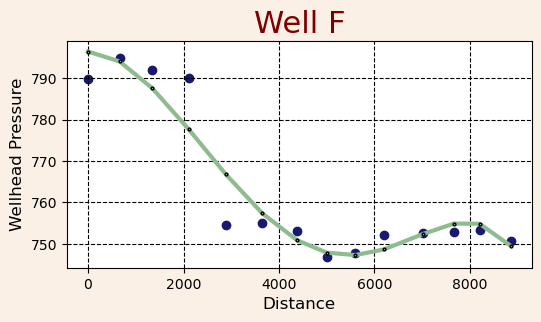

In [150]:
polyf = PolynomialFeatures(degree=5)
# Transform our x input to 1, x and x^2
X_polyf = polyf.fit_transform(Xf)
pr_modelf = LinearRegression()
pr_modelf.fit(X_polyf, yf)
y_predf = pr_modelf.predict(X_polyf)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(Xf, yf, c = "midnightblue")
plt.title('Well F',{'fontsize':22,'color':'maroon'})
plt.xlabel("Distance",fontdict={'fontsize':12})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':12})
plt.grid(b=True,which='both',linestyle='--',color='black')
plt.magma()
plt.plot(Xf, y_predf,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')


plt.show()

In [151]:
f = minimum(pr_modelf,polyf,744.53)

Smallest: [0.00368164]
the distance to the smallest change: 5500


# WELL G

In [152]:
wellg = pd.read_excel("well g.xlsx")
print(wellg.head())
wellg1 = wellg.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
wellg1.columns = headers

wellg1['distance'].replace(np.nan, 0, inplace=True)
wellg1['length'].replace(np.nan, 0, inplace=True)
Xg = wellg1.iloc[1:,:1].values
yg = wellg1.iloc[1:,1:2].values

   position  pressure    length  distance
0       NaN       NaN       NaN       NaN
1       NaN    697.09       NaN       NaN
2      0.00    733.87  18127.44  15281.85
3    661.39    735.40  17198.53  14620.46
4   1346.68    733.71  16457.33  13935.17


C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

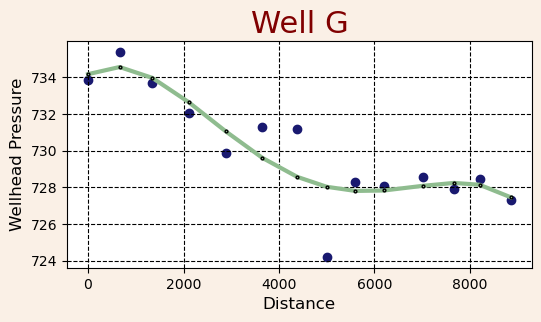

In [153]:
polyg = PolynomialFeatures(degree=4)
# Transform our x input to 1, x and x^2
X_polyg = polyg.fit_transform(Xg)
pr_modelg = LinearRegression()
pr_modelg.fit(X_polyg, yg)
y_predg = pr_modelg.predict(X_polyg)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(Xg, yg, c = "midnightblue")
plt.title('Well G',{'fontsize':22,'color':'maroon'})
plt.xlabel("Distance",fontdict={'fontsize':12})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':12})
plt.grid(b=True,which='both',linestyle='--',color='black')
plt.magma()
plt.plot(Xg, y_predg,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')


plt.show()

In [154]:
g = minimum(pr_modelg,polyg,697.09)

Smallest: [0.04345244]
the distance to the smallest change: 8900


# well h

In [157]:
wellh = pd.read_excel("well h.xlsx")
print(wellh.head())
wellh1 = wellh.dropna(axis = 0,how = 'all')
headers = ['position', 'pressure', 'length','distance']
wellh1.columns = headers

wellh1['distance'].replace(np.nan, 0, inplace=True)
wellh1['length'].replace(np.nan, 0, inplace=True)
Xh = wellh1.iloc[1:,:1].values
yh = wellh1.iloc[1:,1:2].values

   position  pressure    length  distance
0       NaN       NaN       NaN       NaN
1       NaN    845.69       NaN       NaN
2      0.00    873.03  18478.21  15632.62
3    661.39    873.96  17549.30  14971.23
4   1346.68    872.71  16808.10  14285.94


C:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

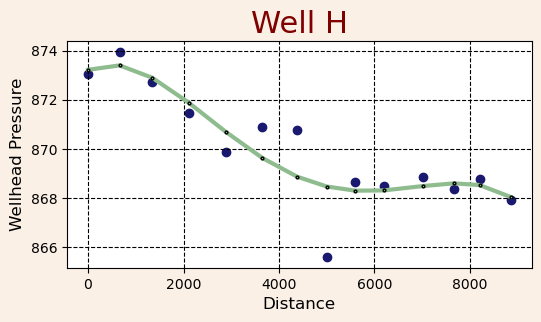

In [158]:
polyh = PolynomialFeatures(degree=4)
# Transform our x input to 1, x and x^2
X_polyh = polyh.fit_transform(Xh)
pr_modelh = LinearRegression()
pr_modelh.fit(X_polyh, yh)
y_predh = pr_modelh.predict(X_polyh)
fig = plt.figure()
plt.figure(figsize=(6,3),dpi=100,facecolor='linen',edgecolor='teal')
plt.scatter(Xh, yh, c = "midnightblue")
plt.title('Well H',{'fontsize':22,'color':'maroon'})
plt.xlabel("Distance",fontdict={'fontsize':12})
plt.ylabel("Wellhead Pressure",fontdict={'fontsize':12})
plt.grid(b=True,which='both',linestyle='--',color='black')
plt.magma()
plt.plot(Xh, y_predh,color='darkseagreen',linewidth=3,marker='.',markersize=4,markeredgecolor='black')

plt.show()

In [159]:
h = minimum(pr_modelh,polyh,845.69)

Smallest: [0.02637109]
the distance to the smallest change: 8900


In [169]:
count = 0
small = None
for i in range (0,9000,100):
    predictiona = pr_model.predict(poly.fit_transform([[i]]))
    changea =(predictiona-753.25)/753.25 
    predictionb = pr_modelb.predict(polyb.fit_transform([[i]]))
    changeb =(predictionb-951.22)/951.22 
    predictionc = pr_modelc.predict(polyc.fit_transform([[i]]))
    changec =(predictionc-814.39)/ 814.39
    predictione = pr_modele.predict(polye.fit_transform([[i]]))
    changee =(predictione-782.13)/ 782.13
    predictionf = pr_modelf.predict(polyf.fit_transform([[i]]))
    changef =(predictionf-744.53)/744.53 
    predictiong = pr_modelg.predict(polyg.fit_transform([[i]]))
    changeg =(predictiong-697.09)/697.09 
    predictionh = pr_modelh.predict(polyh.fit_transform([[i]]))
    changeh =(predictionh-845.69)/845.69 
    
    # now measure the total change to predict the best position
    
    total_change = changea + changeb + changec + changee + changef + changeg + changeh
    
    
    for value in total_change:
        if small is None or value < small:
            small = value
            count = 0+i
            
print('smallest change: ',small)
print('position for the well: ',count)
            
    
    
    

smallest change:  [0.24426284]
position for the well:  8900


In [172]:
count = 0
small = None
for i in range (0,9000,100):
    predictiona = pr_model.predict(poly.fit_transform([[i]]))
    changea =(predictiona-753.25)/753.25 
    predictionb = pr_modelb.predict(polyb.fit_transform([[i]]))
    changeb =(predictionb-951.22)/951.22 
    
    predictione = pr_modele.predict(polye.fit_transform([[i]]))
    changee =(predictione-782.13)/ 782.13
    predictionf = pr_modelf.predict(polyf.fit_transform([[i]]))
    changef =(predictionf-744.53)/744.53 
    
    total_change = changea + changeb + changee + changef
    
    
    for value in total_change:
        if small is None or value < small:
            small = value
            count = 0+i
            
print('smallest change: ',small)
print('position for the well: ',count)
            

smallest change:  [0.11849499]
position for the well:  8900
